In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [3]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [4]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 604800
offset = 2840588
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s OFFSET %s" % (location,chunk_size,offset))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-23 16:50:32.499186
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 604800 OFFSET 2840588
End date and time using str method of datetime object:
2016-12-23 16:55:30.507848
Execution Completed


In [5]:
dfs.shape

(604800, 16)

In [6]:
dfs.head()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
0,66812921,2015-12-16,00:00:00,237.62,237.03,236.87,5.49,17.48,14.67,16.12,8518.95,8919.85,0.88,2813,7727976.96,Torschlag_Trafo_16122015.csv
1,66812922,2015-12-16,00:00:01,237.62,237.03,236.87,5.49,17.48,14.67,16.12,8518.95,8919.85,0.88,2813,7727976.96,Torschlag_Trafo_16122015.csv
2,66812923,2015-12-16,00:00:02,237.62,237.03,236.87,5.49,17.48,14.67,16.12,8518.95,8919.85,0.88,2813,7727976.96,Torschlag_Trafo_16122015.csv
3,66812924,2015-12-16,00:00:03,237.71,237.15,236.96,5.60,17.52,14.72,16.06,8554.44,8972.42,0.88,2813,7727985.92,Torschlag_Trafo_16122015.csv
4,66812925,2015-12-16,00:00:04,237.71,237.15,236.96,5.60,17.52,14.72,16.06,8554.44,8972.42,0.88,2813,7727985.92,Torschlag_Trafo_16122015.csv


In [7]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
604795,67685736,2015-12-19,23:59:55,235.92,235.44,235.04,8.00,15.72,19.26,15.72,9387.79,10118.63,0.88,5762,10023742.72,Torschlag_Trafo_19122015.csv
604796,67685737,2015-12-19,23:59:56,235.92,235.44,235.04,8.00,15.72,19.26,15.72,9387.79,10118.63,0.88,5762,10023742.72,Torschlag_Trafo_19122015.csv
604797,67685738,2015-12-19,23:59:57,235.92,235.44,235.04,8.00,15.72,19.26,17.69,9387.79,10118.63,0.88,5762,10023742.72,Torschlag_Trafo_19122015.csv
604798,67685739,2015-12-19,23:59:58,235.75,235.22,235.14,7.93,19.43,19.39,17.69,10296.09,10991.43,0.88,5762,10023752.96,Torschlag_Trafo_19122015.csv
604799,67685740,2015-12-19,23:59:59,235.75,235.22,235.14,7.93,19.43,19.39,17.69,10296.09,10991.43,0.88,5762,10023752.96,Torschlag_Trafo_19122015.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [8]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [9]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [10]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [11]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

407

In [12]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,0.132989,0.161766,0.188099,-0.054163,-0.086529,-0.106965,-0.120150,-0.087111,-0.083011,-0.135908,0.032644,0.094772
V1,0.132989,1.000000,0.980936,0.987221,-0.264092,-0.277401,-0.274861,-0.216064,-0.270408,-0.268289,-0.245104,-0.143427,-0.143613
V2,0.161766,0.980936,1.000000,0.987279,-0.367700,-0.402966,-0.390084,-0.347039,-0.386820,-0.385638,-0.266207,-0.082298,-0.081577
V3,0.188099,0.987221,0.987279,1.000000,-0.311489,-0.329162,-0.333774,-0.280260,-0.323503,-0.321920,-0.262408,-0.070489,-0.068216
I1,-0.054163,-0.264092,-0.367700,-0.311489,1.000000,0.957615,0.971056,0.692305,0.983220,0.984691,0.558118,0.020928,0.029627
I2,-0.086529,-0.277401,-0.402966,-0.329162,0.957615,1.000000,0.974315,0.840230,0.989621,0.989638,0.474158,0.025014,0.033090
I3,-0.106965,-0.274861,-0.390084,-0.333774,0.971056,0.974315,1.000000,0.759488,0.992251,0.992388,0.520360,-0.010680,-0.002989
I_N,-0.120150,-0.216064,-0.347039,-0.280260,0.692305,0.840230,0.759488,1.000000,0.778913,0.779289,0.214044,-0.023591,-0.016656
Pges,-0.087111,-0.270408,-0.386820,-0.323503,0.983220,0.989621,0.992251,0.778913,1.000000,0.999467,0.531668,0.017725,0.025971
Sges,-0.083011,-0.268289,-0.385638,-0.321920,0.984691,0.989638,0.992388,0.779289,0.999467,1.000000,0.518774,0.011974,0.020411


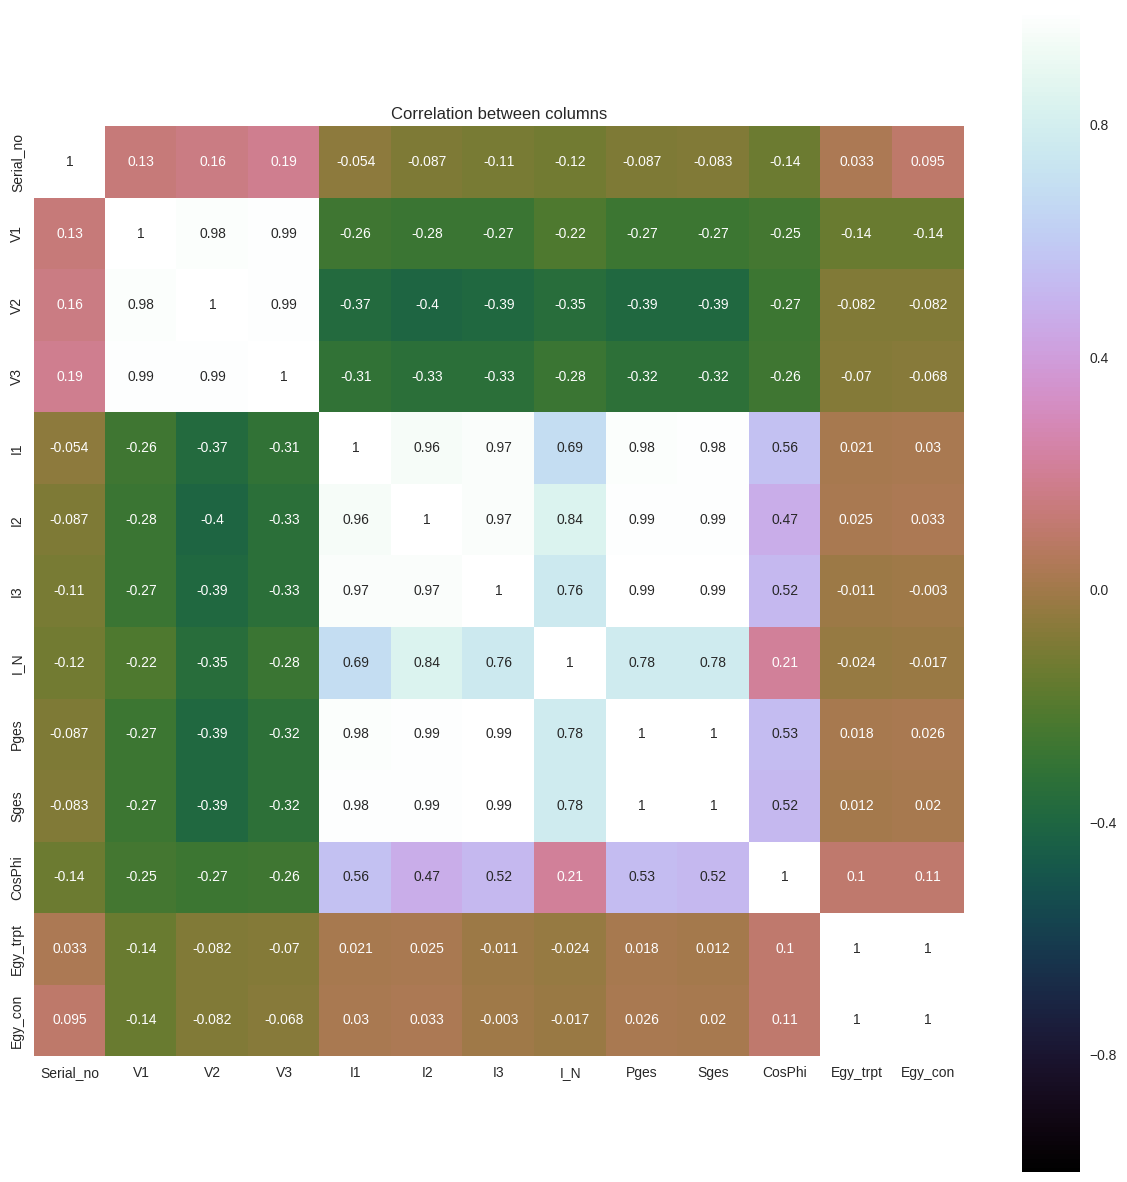

In [13]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_2840588_3445387.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [14]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [15]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,604800.00000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000,604800.000000
mean,234.28564,233.809070,233.728383,25.967842,45.498608,39.175409,21.261449,24507.537740,25820.092487,0.898833,11446.387561,14956526.684353
std,1.58465,1.649225,1.615871,29.519973,39.304133,34.133447,11.284314,22610.430523,23707.957118,0.042319,9594.275773,6808512.460445
min,227.69000,227.190000,227.650000,1.440000,4.080000,3.480000,4.530000,-449.540000,3568.720000,0.530000,2813.000000,7727976.960000
25%,233.14000,232.690000,232.570000,6.330000,17.050000,14.780000,12.930000,8654.340000,9134.100000,0.880000,2813.000000,9121308.160000
50%,234.23000,233.820000,233.690000,8.540000,25.300000,21.370000,17.030000,12430.750000,12976.250000,0.900000,3365.000000,9922624.000000
75%,235.46000,234.990000,234.910000,42.110000,72.580000,60.900000,27.670000,38970.840000,41223.810000,0.930000,22495.000000,22342773.760000
max,238.66000,238.140000,238.040000,157.680000,208.570000,190.420000,86.020000,120989.950000,127723.880000,1.000000,22495.000000,23879272.960000


# Saving the basic statistics to csv

In [16]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_2840588_3445387_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [17]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [18]:
#dfs_grp_loc.groupby('Location').describe()

In [19]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_16122015.csv CosPhi     1.000000 -0.012307       NaN   
                             Egy_con   -0.012307  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.758555  0.060400       NaN   
                             I2         0.717375  0.090769       NaN   
                             I3         0.734922  0.136766       NaN   
                             I_N        0.471239  0.098972       NaN   
                             Pges       0.749762  0.101829       NaN   
                             Serial_no  0.023303  0.978294       NaN   
                             Sges       0.741741  0.097968       NaN   
                             V1        -0.549311 -0.264585       NaN   
                             V2        -0.567638 -0.237424       NaN   
                             V3        -0.557227 -0.269322       NaN   
Torschlag_Trafo_17012016.csv CosPhi     1.000000 -0.101039       NaN   
                             Egy_con   -0.101039  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.622263  0.113276       NaN   
                             I2        -0.469133  0.190771       NaN   
                             I3        -0.170992  0.275412       NaN   
                             I_N       -0.760343  0.053175       NaN   
                             Pges       0.007457  0.253514       NaN   
                             Serial_no -0.093842  0.999298       NaN   
                             Sges      -0.029630  0.278207       NaN   
                             V1        -0.058459  0.146879       NaN   
                             V2         0.015474  0.057429       NaN   
                             V3         0.006952  0.105833       NaN   
Torschlag_Trafo_17122015.csv CosPhi     1.000000  0.007040       NaN   
                             Egy_con    0.007040  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.617719  0.052616       NaN   
...                                          ...       ...       ...   
Torschlag_Trafo_18122015.csv Sges       0.394830  0.027356       NaN   
                             V1         0.039025  0.320733       NaN   
                             V2         0.000564  0.279212       NaN   
                             V3         0.025369  0.352960       NaN   
Torschlag_Trafo_19012016.csv CosPhi     1.000000 -0.116493       NaN   
                             Egy_con   -0.116493  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.709757 -0.022262       NaN   
                             I2         0.647188  0.015196       NaN   
                             I3         0.665823 -0.012413       NaN   
                             I_N        0.361545  0.261457       NaN   
                             Pges       0.686795 -0.000443       NaN   
                             Serial_no -0.142106  0.978117       NaN   
                             Sges       0.678445 -0.003034       NaN   
                             V1        -0.058522  0.382556       NaN   
                             V2        -0.108044  0.350312       NaN   
                             V3        -0.092437  0.357755       NaN   
Torschlag_Trafo_19122015.csv CosPhi     1.000000 -0.170141 -0.083708   
                             Egy_con   -0.170141  1.000000  0.867637   
                             Egy_trpt  -0.083708  0.867637  1.000000   
                             I1         0.437971  0.188032  0.257798   
                             I2        -0.272256  0.306181  0.052533   
                             I3         0.412630  0.241858  0.167336   
          

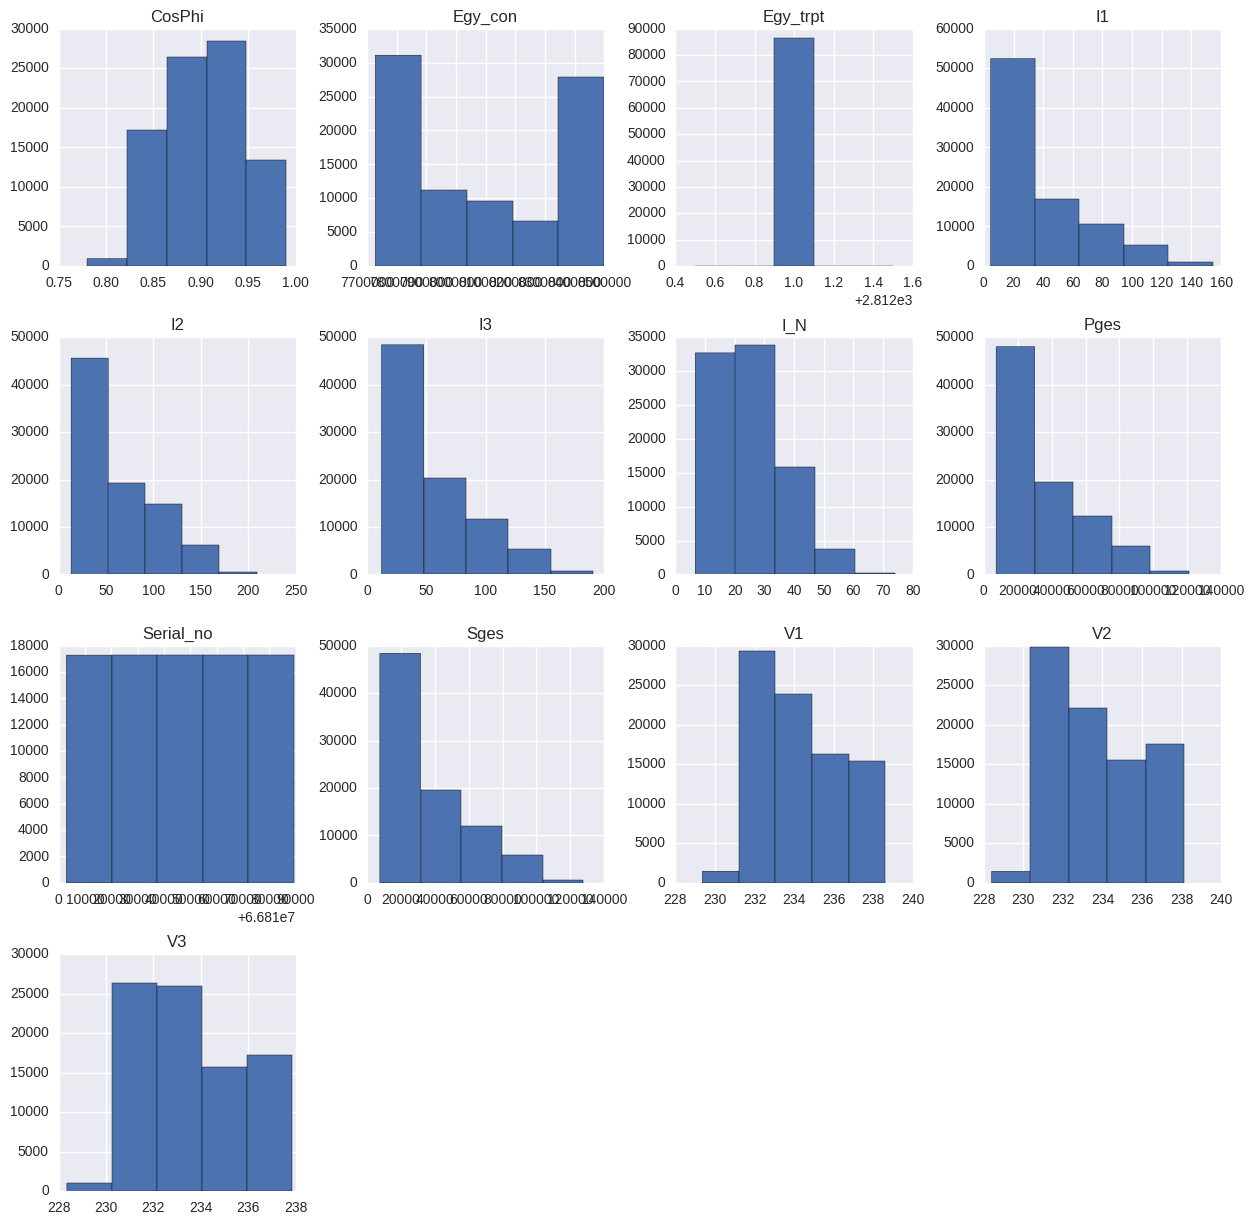

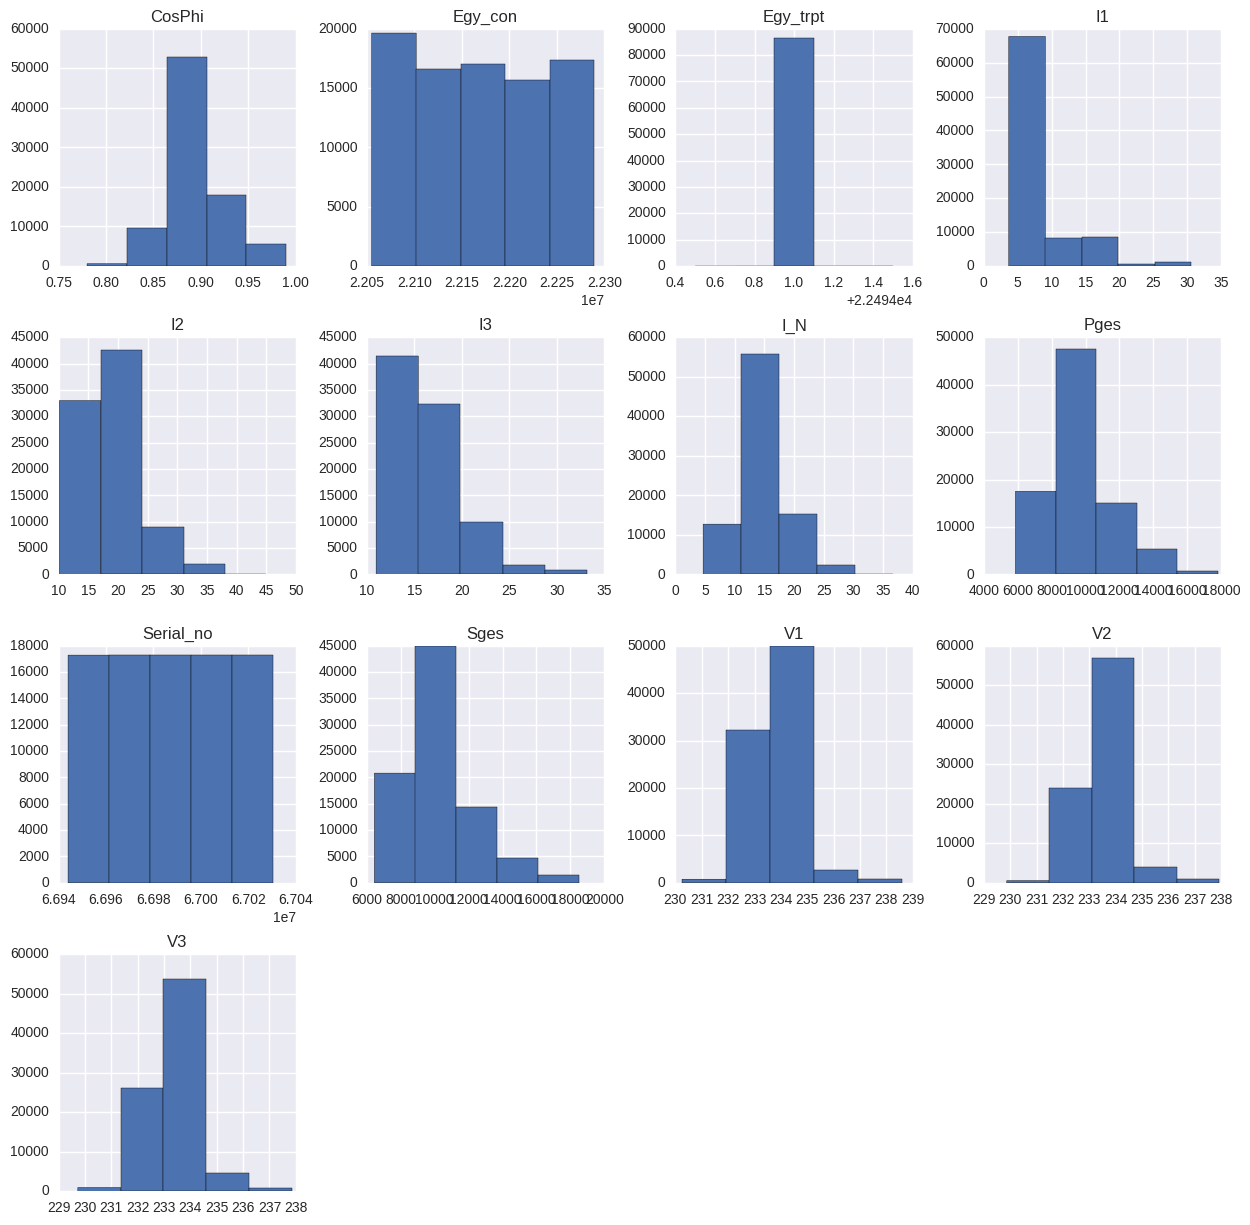

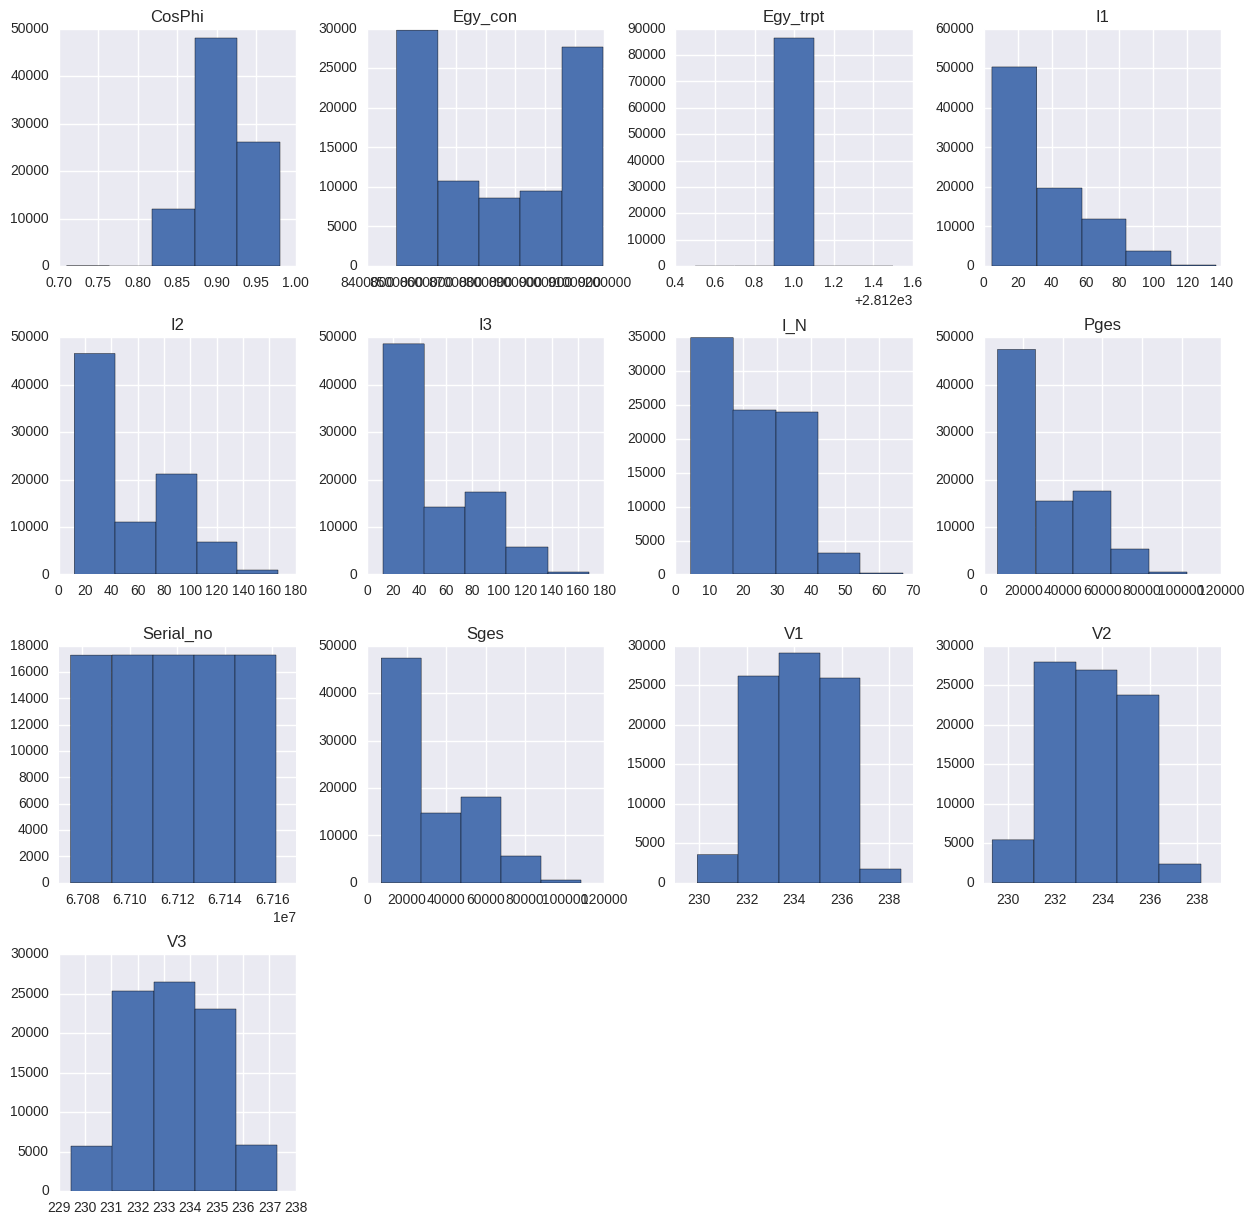

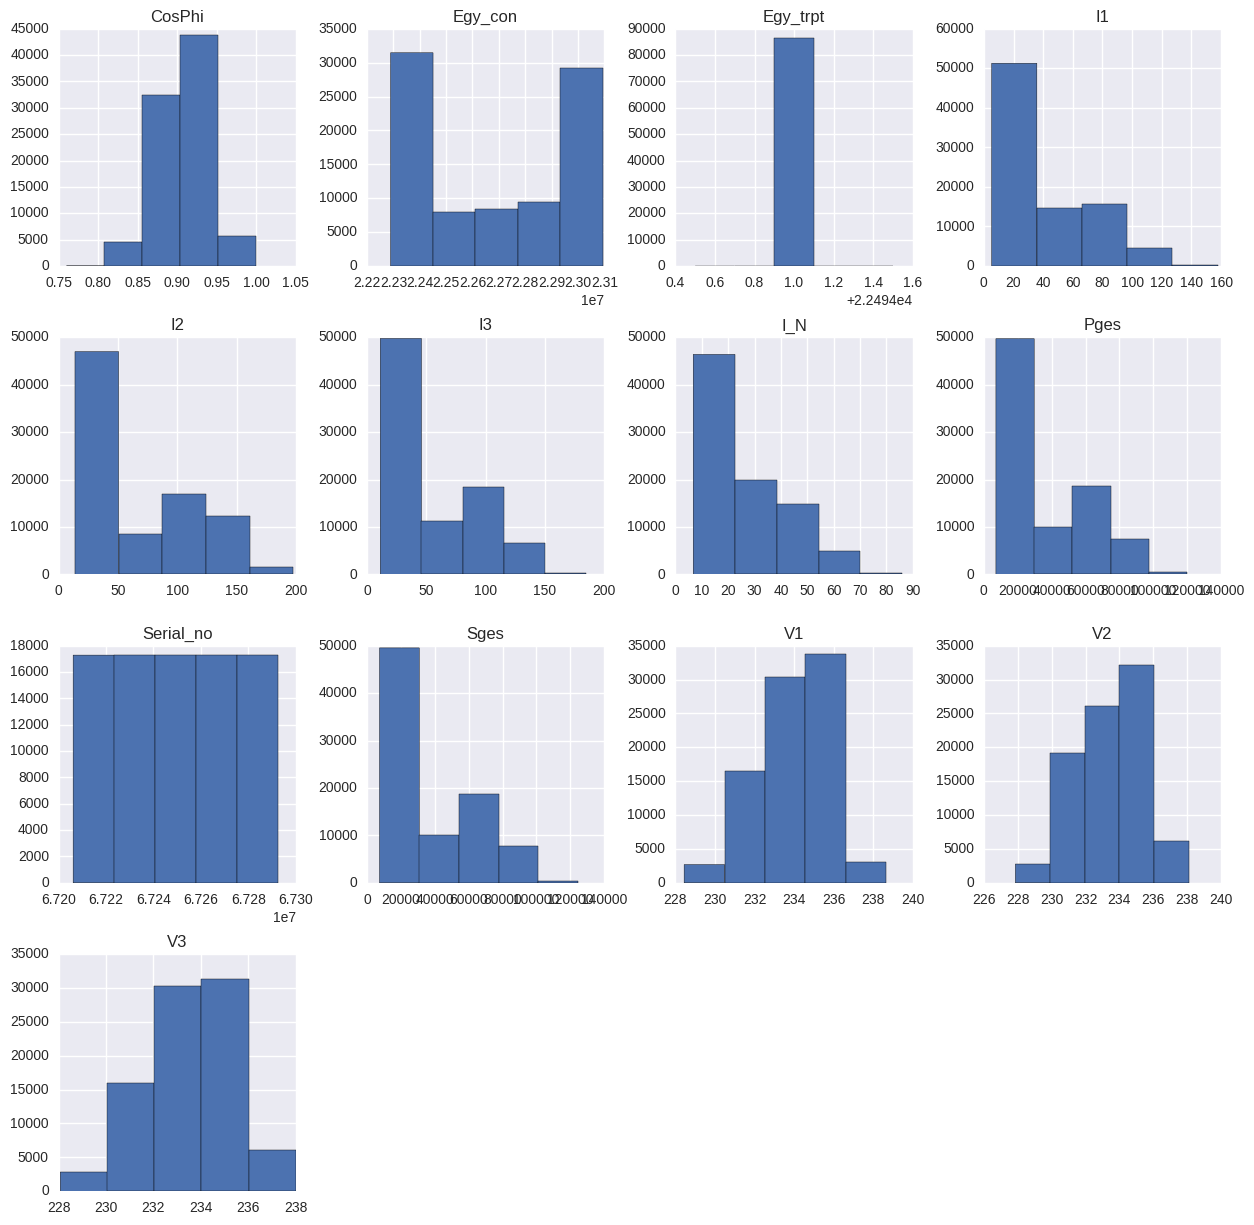

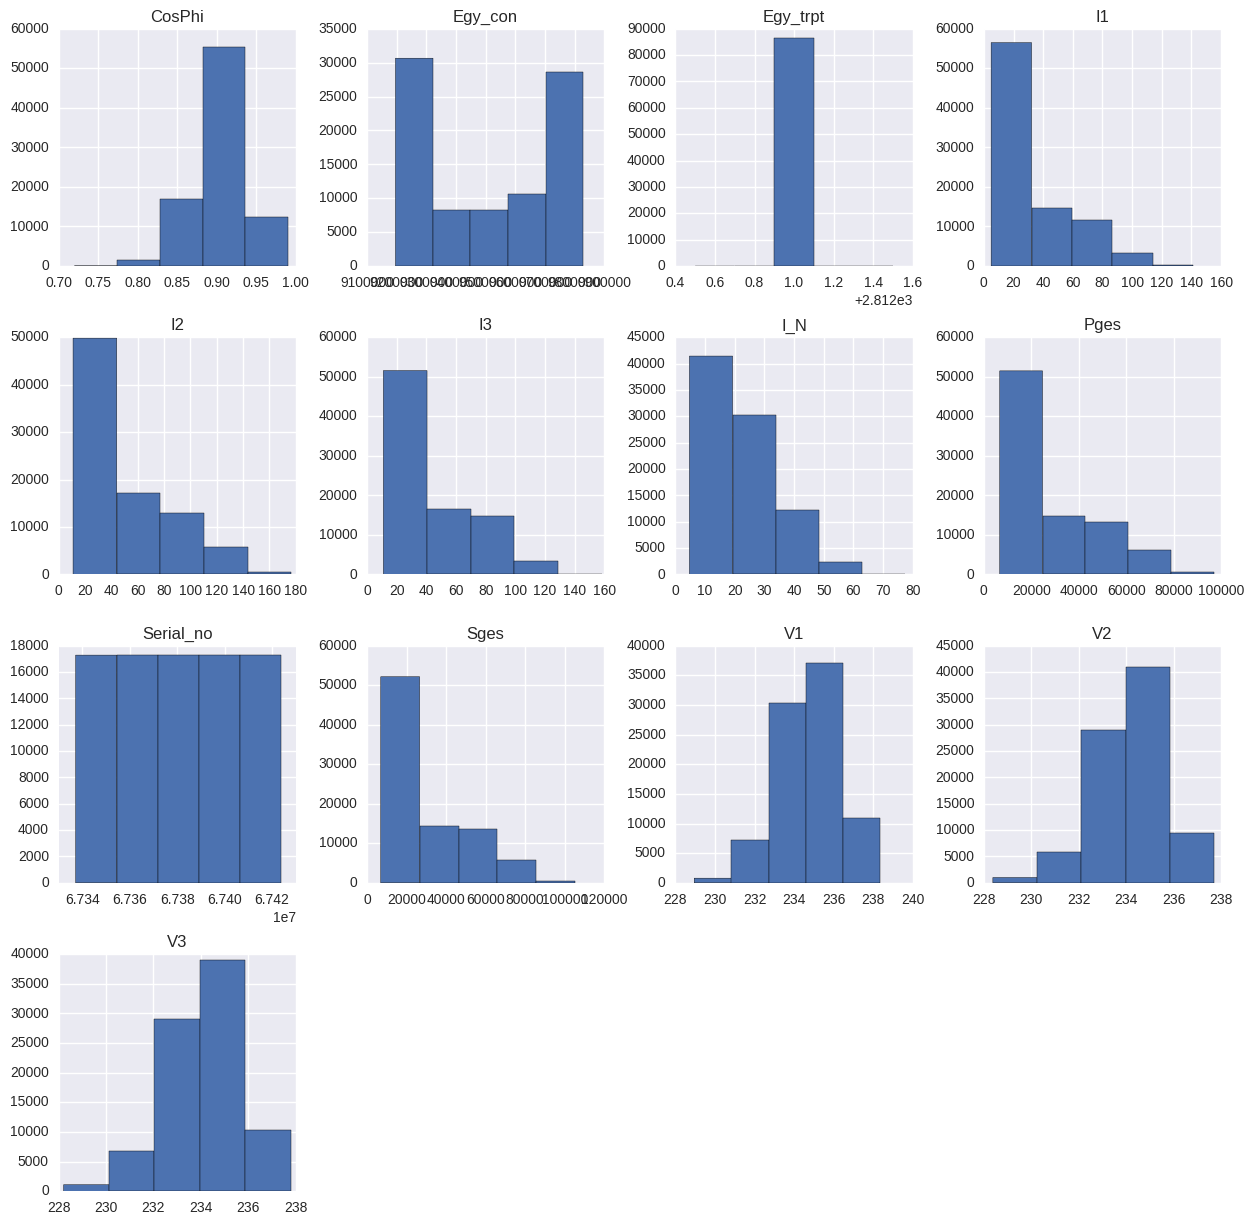

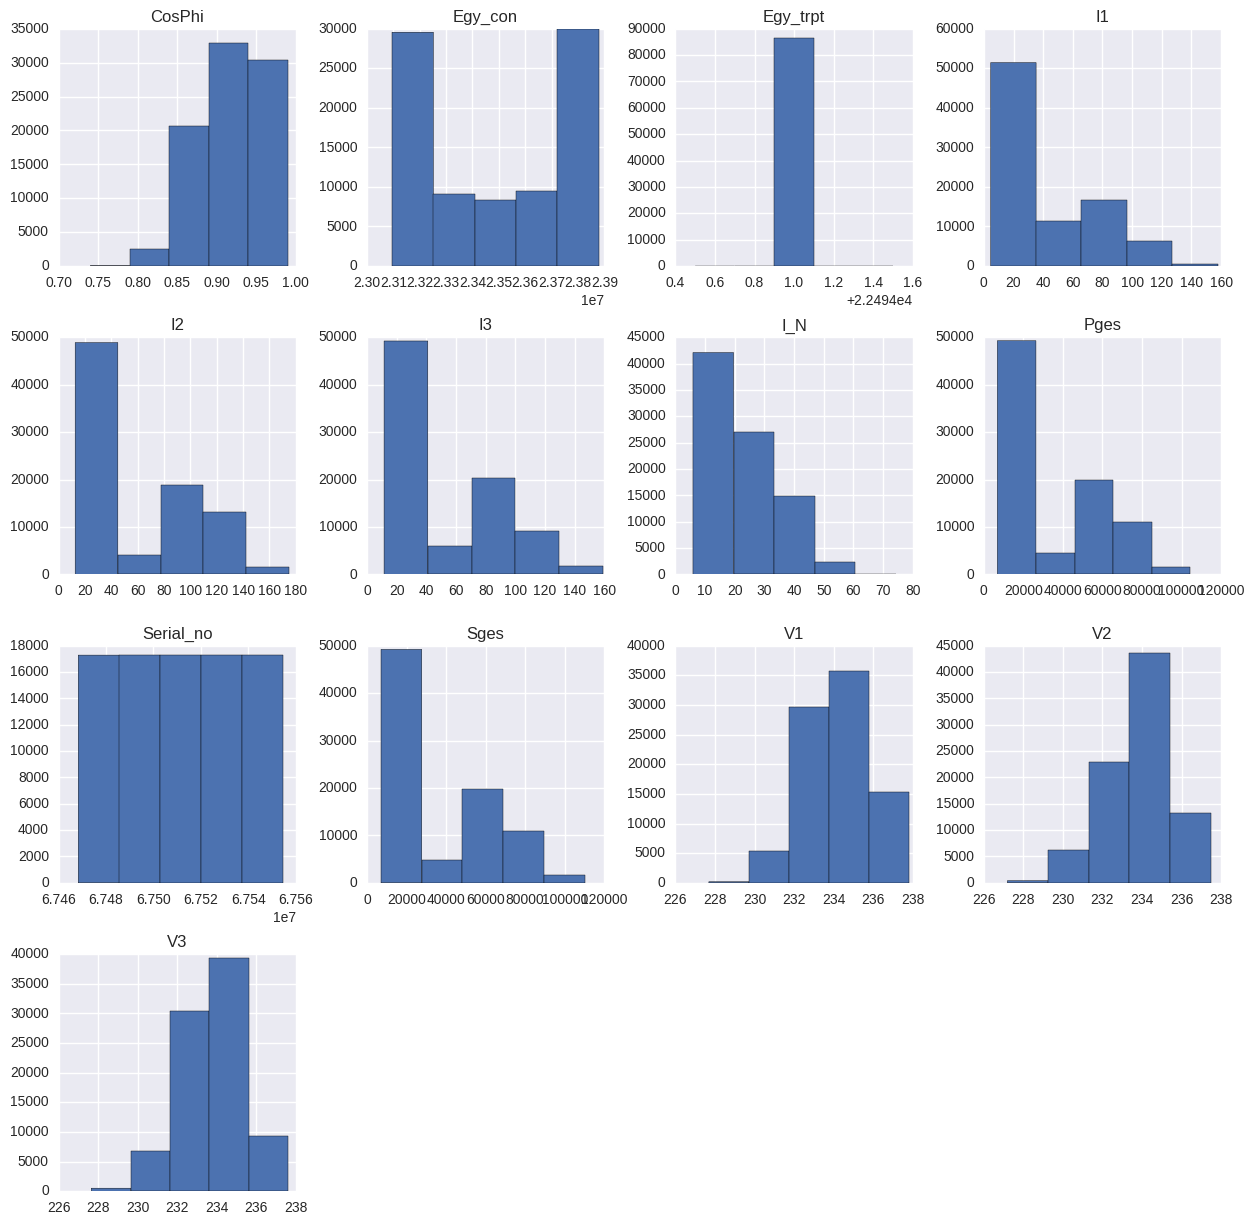

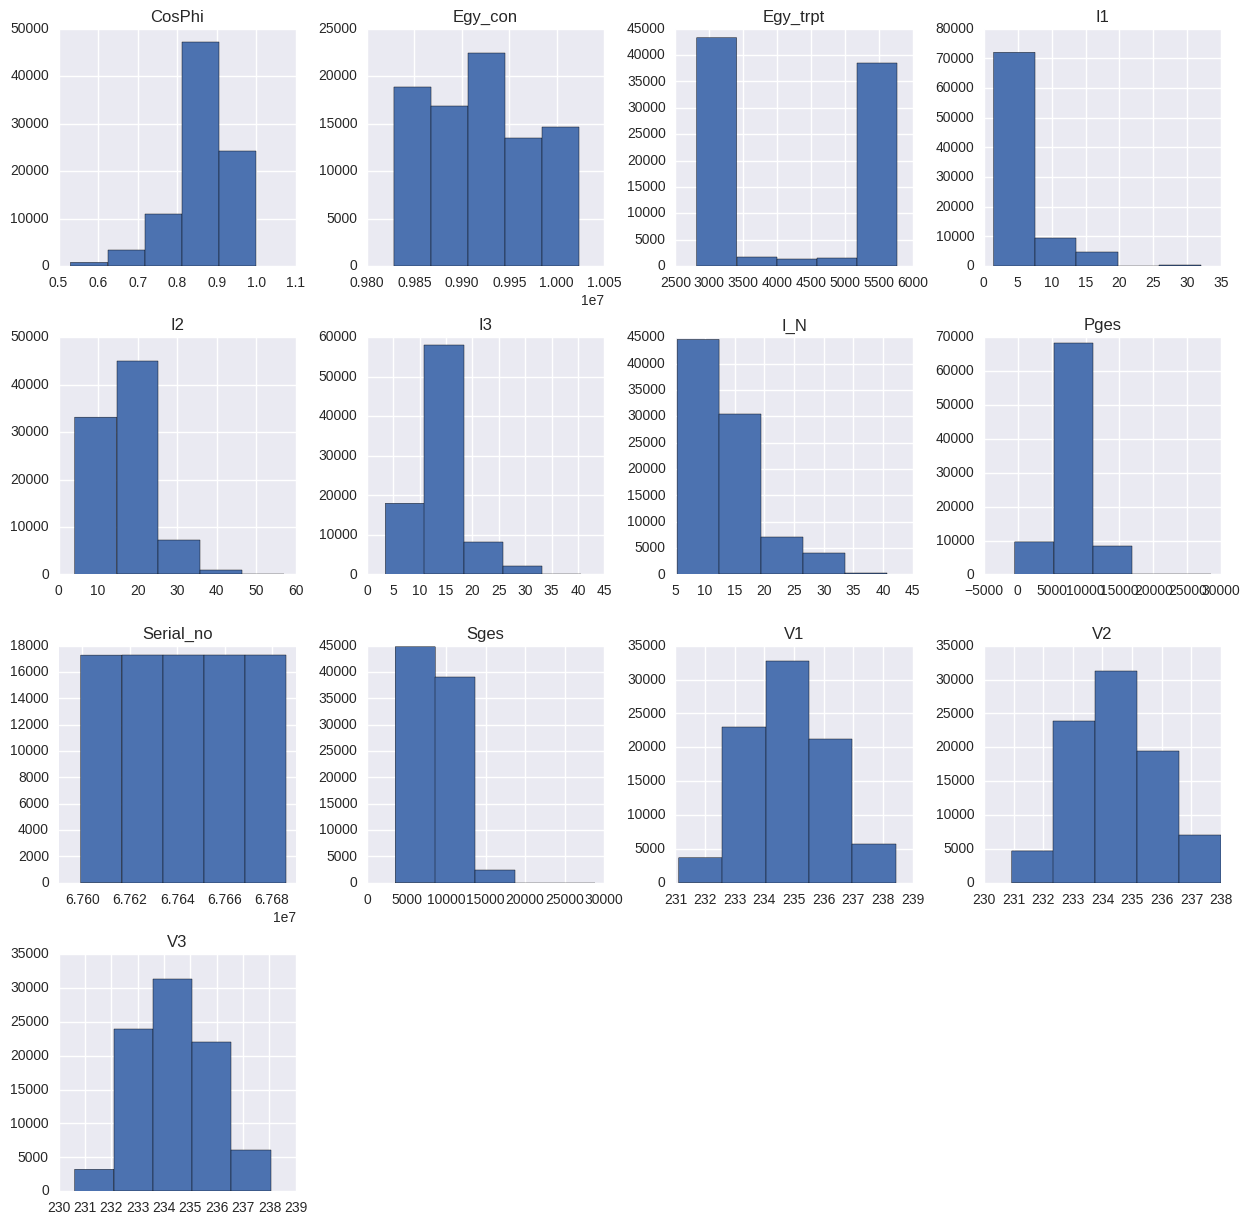

In [20]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_Trafo_groupby_location_pearson_corr_2840588_3445387.png')
    

# Compute only the mean of the data grouped by location and visualize

In [21]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_16122015.csv,66856120,234.305500,233.647636,233.564566,33.415852,59.545548,51.617088,25.827085,32158.776100,33642.089150,0.901557,2813.000000,8091464.542726
Torschlag_Trafo_17012016.csv,66987190,233.827227,233.521566,233.340417,8.654700,19.129863,16.366810,14.685550,9769.995712,10308.066859,0.893175,22495.000000,22168903.085068
Torschlag_Trafo_17122015.csv,67118260,234.160695,233.571882,233.381125,30.664395,51.664248,49.111807,23.167255,28998.675761,30643.966811,0.906951,2813.000000,8837916.809496
Torschlag_Trafo_18012016.csv,67249330,233.994386,233.488323,233.539162,35.243668,63.781295,51.624834,26.121602,33562.541736,35054.127710,0.908929,22495.000000,22682351.168119
Torschlag_Trafo_18122015.csv,67380400,234.725399,234.123284,234.064240,29.635011,48.283830,41.865923,22.569545,26352.385652,28062.882618,0.904777,2813.000000,9506996.815636
Torschlag_Trafo_19012016.csv,67511470,234.166049,233.856038,233.816707,37.406952,58.914438,50.039094,22.608630,32691.235241,34232.954712,0.911975,22495.000000,23487109.512920
Torschlag_Trafo_19122015.csv,67642540,234.820225,234.454764,234.392463,6.754319,17.171034,13.602306,13.850478,8019.153981,8796.559550,0.864464,4200.712928,9920944.856510


In [22]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_2840588_3445387.csv',sep=',')

# Plot the groupby location 

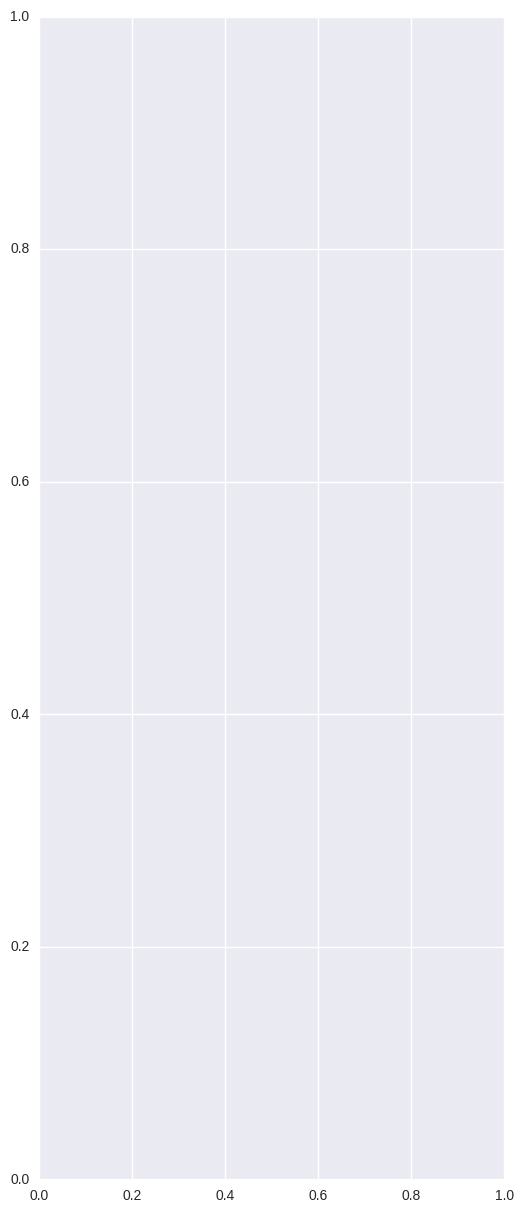

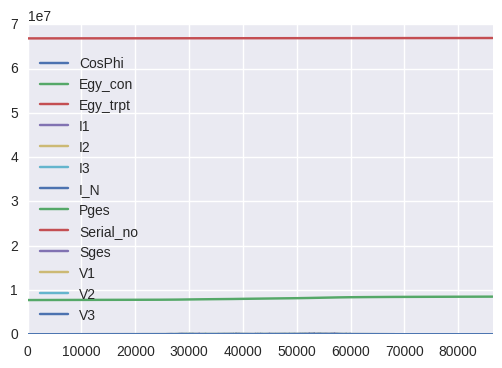

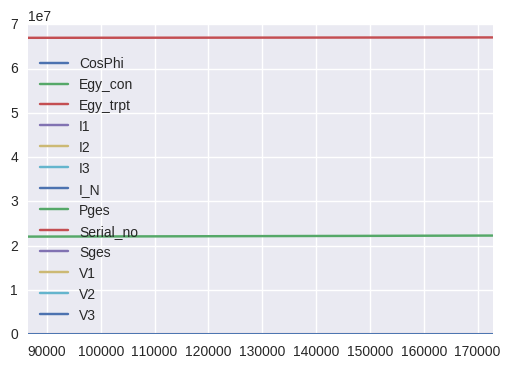

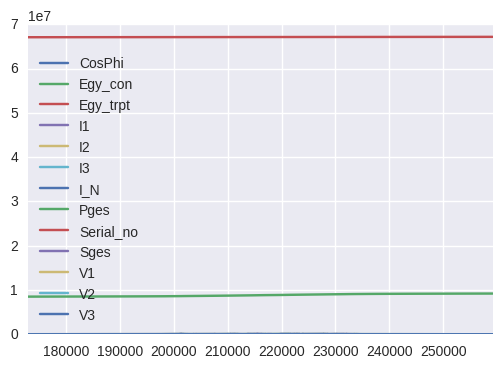

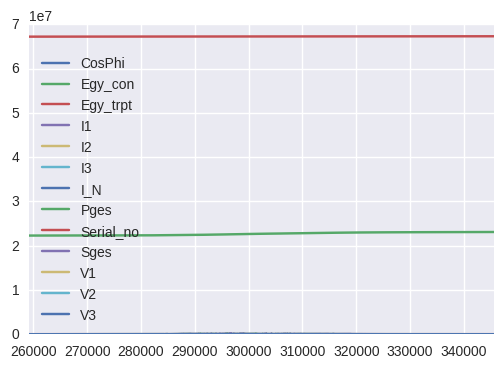

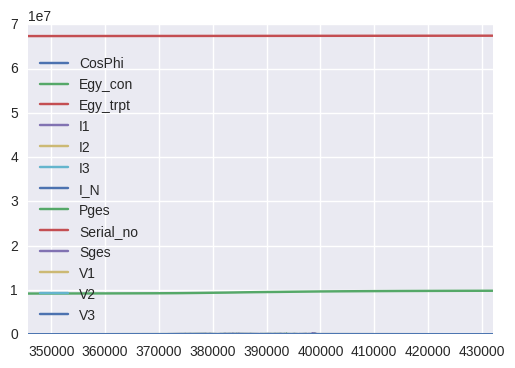

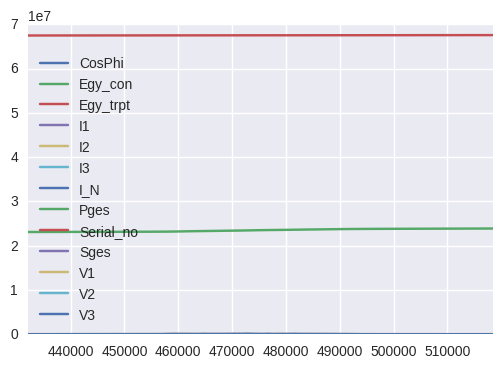

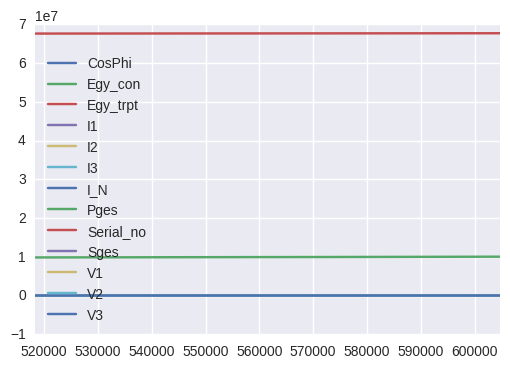

In [23]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [24]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [25]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [26]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 237.62,  237.03,  236.87,    5.49,   17.48,   14.67],
       [ 237.62,  237.03,  236.87,    5.49,   17.48,   14.67],
       [ 237.62,  237.03,  236.87,    5.49,   17.48,   14.67],
       ..., 
       [ 235.92,  235.44,  235.04,    8.  ,   15.72,   19.26],
       [ 235.75,  235.22,  235.14,    7.93,   19.43,   19.39],
       [ 235.75,  235.22,  235.14,    7.93,   19.43,   19.39]])

In [27]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [28]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [29]:
Y_sklearn.shape

(604800, 6)

In [30]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-3.325735,1.564670,0.044756,0.029971,0.120602,-0.019561
1,-3.325735,1.564670,0.044756,0.029971,0.120602,-0.019561
2,-3.325735,1.564670,0.044756,0.029971,0.120602,-0.019561
3,-3.399703,1.641676,0.039141,0.032451,0.116396,-0.006040
4,-3.399703,1.641676,0.039141,0.032451,0.116396,-0.006040


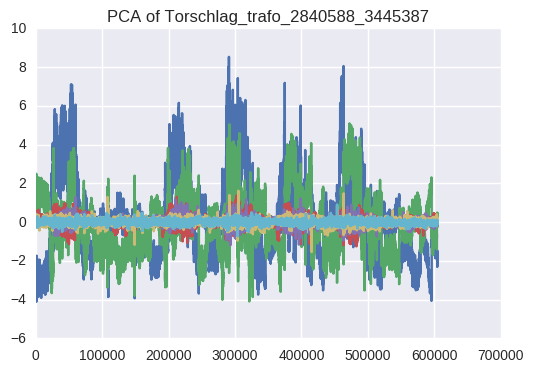

In [31]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_2840588_3445387")

fig.savefig('PCA of Torschlag_Trafo_2840588_3445387.png')


# Plot voltage vs time

# Plot V1 and I1 vs Time of all locations extracted from SQL.

In [32]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()
dfs['Location'].unique()

array(['Torschlag_Trafo_16122015.csv', 'Torschlag_Trafo_17012016.csv',
       'Torschlag_Trafo_17122015.csv', 'Torschlag_Trafo_18012016.csv',
       'Torschlag_Trafo_18122015.csv', 'Torschlag_Trafo_19012016.csv',
       'Torschlag_Trafo_19122015.csv'], dtype=object)

In [33]:
def plotfunc(ax, a, b):
    return ax.plot(a, b)

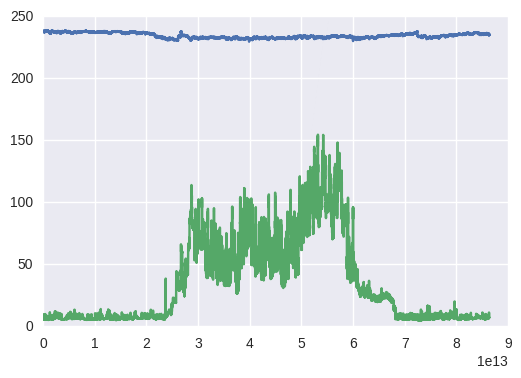

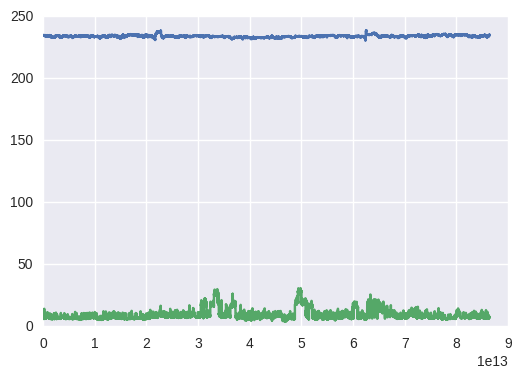

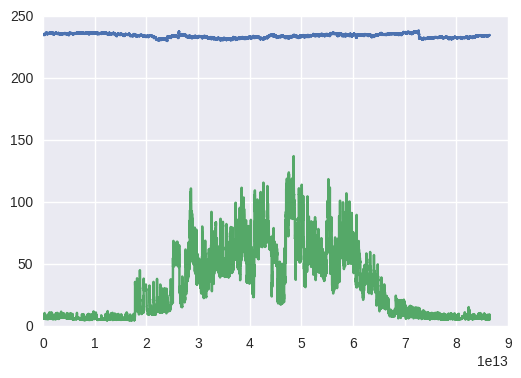

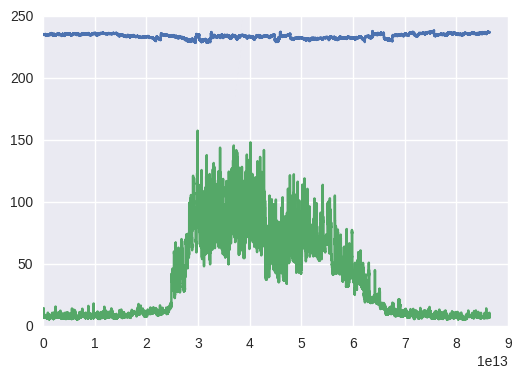

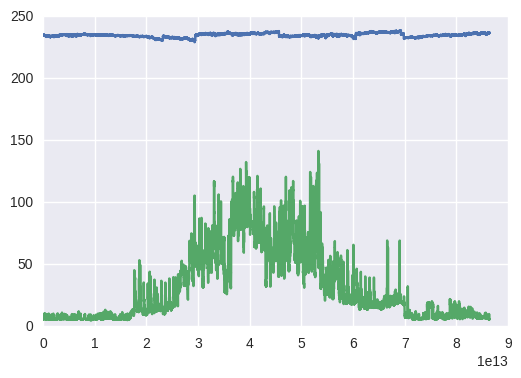

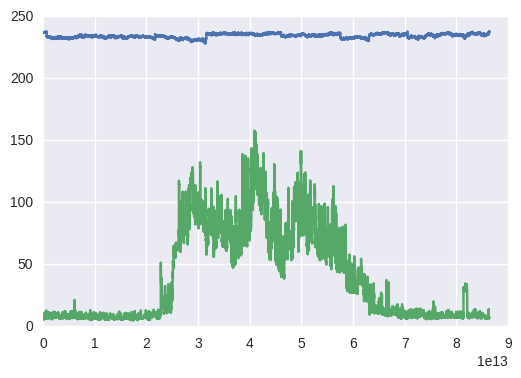

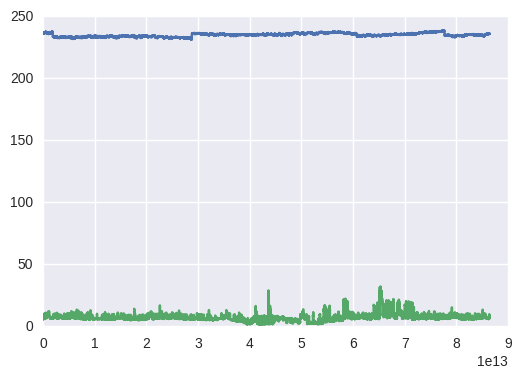

In [34]:
for loc in iter(dfs['Location'].unique()):
    fig, ax = plt.subplots(1,1)
    b = dfs['V1'].where (dfs['Location'] == loc)
    b1 = dfs['I1'].where (dfs['Location'] == loc)
    a = dfs['Time'].where (dfs['Location'] == loc)
    l1 = plotfunc(ax, a, b)
    l2 = plotfunc(ax, a, b1)
    plt.savefig('V1_I1_Time of %s.png' % loc)
    plt.show()